# Water quality (Machine Learning)
Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


Helps interface with the os

In [2]:
import os
print(os.listdir(r"D:\Water quality machine learning"))

['SS', 'waterquality.csv', 'water_dataX.csv']


Reading the data

In [3]:
data=pd.read_csv(r'D:\Water quality machine learning\water_dataX.csv')

In [4]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (?mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,7.2,738,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,6.3,585,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,6.2,98,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,6.5,91,1.3,NAN,NAN,562,2003


Checking the data types

In [5]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (?mhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [6]:
# Changing the datatypes to numeric
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (?mhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (?mhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [7]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (?mhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



In [9]:
start=1
end=1990
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [10]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (?mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,7.2,738.0,2.7,0.518,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,6.3,585.0,2.6,0.155,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,6.2,98.0,1.2,NaN,NaN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,6.5,91.0,1.3,NaN,NaN,562.0,2003


In [11]:
data = data.fillna(data.mean())
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (?mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,11.000000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953.000000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243.000000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382.000000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428.000000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,7.2,738.0,2.700000,0.518000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,6.3,585.0,2.600000,0.155000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,6.2,98.0,1.200000,1.623079,362529.364718,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,6.5,91.0,1.300000,1.623079,362529.364718,562.0,2003


In [12]:
data['LOCATIONS'][1]
columns = ['STATION CODE','LOCATIONS','STATE','Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']

In [13]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (?mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,11.000000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953.000000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243.000000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382.000000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428.000000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,7.2,738.0,2.700000,0.518000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,6.3,585.0,2.600000,0.155000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,6.2,98.0,1.200000,1.623079,362529.364718,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,6.5,91.0,1.300000,1.623079,362529.364718,562.0,2003


In [14]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#calc of B.D.O
data['nbod']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))




In [15]:
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,NaN,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,7.0,7.5,136.0,1.4,0.609,205.0,2003,100,100,60,100,80,100
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.7,0.518,202.0,2003,100,100,60,100,0,100
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.6,0.155,315.0,2003,0,100,60,100,0,100
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.2,NaN,570.0,2003,0,100,40,100,80,0


In [16]:
data = data.fillna(data.mean())
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,534544.976832,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.000000,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.000000,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.000000,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.000000,2014,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,7.0,7.5,136.0,1.4,0.609000,205.000000,2003,100,100,60,100,80,100
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.7,0.518000,202.000000,2003,100,100,60,100,0,100
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.6,0.155000,315.000000,2003,0,100,60,100,0,100
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.2,1.623942,570.000000,2003,0,100,40,100,80,0


In [17]:
SipH = 7.5
SiBOD = 1
SiNa = 20
SiCO = 4
SiDO = 10
SiEC = 75

In [18]:
ReciSi= 1/SipH + 1/SiBOD + 1/SiNa + 1/SiCO + 1/SiDO + 1/SiEC 
k= 1/ReciSi

In [19]:
wipH = k/SipH 
wiBOD= k/SiBOD
wiNa = k/SiNa
wiCO = k/SiCO
wiDO = k/SiDO
wiEC = k/SiEC

In [20]:
SmWi = wipH+wiBOD+wiNa+wiCO+wiDO+wiEC

In [21]:
WipH = wipH/SmWi
WiBOD= wiBOD/SmWi
WiNa = wiNa/SmWi
WiCO = wiCO/SmWi
WiDO = wiDO/SmWi
WiEC = wiEC/SmWi
print (WipH, WiBOD, WiNa, WiCO, WiDO, WiEC)

0.08620689655172414 0.646551724137931 0.032327586206896554 0.16163793103448276 0.06465517241379311 0.008620689655172414


In [22]:
data['wph']=data.npH * WipH
data['wdo']=data.ndo * WiDO
data['wbod']=data.nbod * WiBOD
data['wec']=data.nec* WiEC
data['wna']=data.nna * WiNa
data['wco']=data.nco * WiCO
data['wqi']=data.wph+data.wdo+data.wbod+data.wec+data.wna+data.wco 
df1  = data.drop(['do','ph','co','bod','na','tc'],axis =1)
df1

,station,location,state,year,npH,ndo,nco,nbod,nec,nna,wph,wdo,wbod,wec,wna,wco,wqi
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,2014,100,80,0,100,60,100,8.620690,5.172414,64.655172,0.517241,3.232759,0.000000,82.198276
2,1475,ZUARI AT PANCHAWADI,GOA,2014,80,100,40,100,60,100,6.896552,6.465517,64.655172,0.517241,3.232759,6.465517,88.232759
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,2014,80,80,40,80,100,100,6.896552,5.172414,51.724138,0.862069,3.232759,6.465517,74.353448
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,2014,100,80,40,100,80,100,8.620690,5.172414,64.655172,0.689655,3.232759,6.465517,88.836207
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,2014,100,80,40,100,80,100,8.620690,5.172414,64.655172,0.689655,3.232759,6.465517,88.836207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,2003,100,100,60,100,80,100,8.620690,6.465517,64.655172,0.689655,3.232759,9.698276,93.362069
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,2003,100,100,60,100,0,100,8.620690,6.465517,64.655172,0.000000,3.232759,9.698276,92.672414
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,2003,0,100,60,100,0,100,0.000000,6.465517,64.655172,0.000000,3.232759,9.698276,84.051724
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,2003,0,100,40,100,80,0,0.000000,6.465517,64.655172,0.689655,0.000000,6.465517,78.275862


In [23]:
dum = ['station','location','state']
data[dum]

,station,location,state
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
2,1475,ZUARI AT PANCHAWADI,GOA
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA
...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN


In [24]:
df_dummy = pd.get_dummies(data[dum])
df= pd.concat([data, df_dummy], axis = 1)


In [25]:
dataframe = df1.drop(['ndo','nbod','nec','nna','nco','npH'],axis =1)

columns = ['wdo','wbdo','wec','wna','wco','wph']
labels = ['wqi']
corr_matrix = dataframe.corr()
corr_matrix

,year,wph,wdo,wbod,wec,wna,wco,wqi
year,1.000000,0.203886,-0.039906,0.040700,0.082973,0.174598,0.080135,0.093702
wph,0.203886,1.000000,0.025840,-0.086888,-0.150928,-0.054409,-0.053861,0.070359
wdo,-0.039906,0.025840,1.000000,0.445919,0.338673,-0.004743,0.314043,0.546727
wbod,0.040700,-0.086888,0.445919,1.000000,0.418756,0.039971,0.388546,0.955752
wec,0.082973,-0.150928,0.338673,0.418756,1.000000,0.000085,0.291971,0.443479
wna,0.174598,-0.054409,-0.004743,0.039971,0.000085,1.000000,-0.133494,0.053021
wco,0.080135,-0.053861,0.314043,0.388546,0.291971,-0.133494,1.000000,0.577299
wqi,0.093702,0.070359,0.546727,0.955752,0.443479,0.053021,0.577299,1.000000


In [26]:
dataframe

,station,location,state,year,wph,wdo,wbod,wec,wna,wco,wqi
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,2014,8.620690,5.172414,64.655172,0.517241,3.232759,0.000000,82.198276
2,1475,ZUARI AT PANCHAWADI,GOA,2014,6.896552,6.465517,64.655172,0.517241,3.232759,6.465517,88.232759
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,2014,6.896552,5.172414,51.724138,0.862069,3.232759,6.465517,74.353448
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,2014,8.620690,5.172414,64.655172,0.689655,3.232759,6.465517,88.836207
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,2014,8.620690,5.172414,64.655172,0.689655,3.232759,6.465517,88.836207
...,...,...,...,...,...,...,...,...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,2003,8.620690,6.465517,64.655172,0.689655,3.232759,9.698276,93.362069
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,2003,8.620690,6.465517,64.655172,0.000000,3.232759,9.698276,92.672414
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,2003,0.000000,6.465517,64.655172,0.000000,3.232759,9.698276,84.051724
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,2003,0.000000,6.465517,64.655172,0.689655,0.000000,6.465517,78.275862


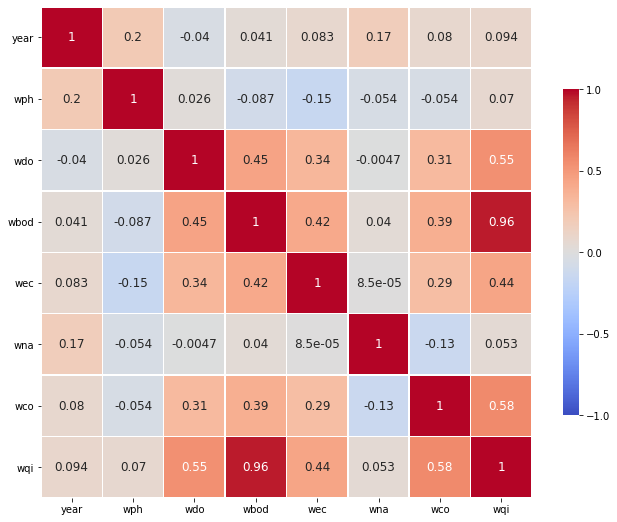

In [27]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [28]:
#calculation overall wqi for each year
ag=df1.groupby('year')['wqi'].mean()

In [29]:
ag.head()

year
2003    80.144669
2004    73.879310
2005    75.881629
2006    76.446634
2007    78.864943
Name: wqi, dtype: float64

In [30]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2003,80.144669
1,2004,73.879310
2,2005,75.881629
3,2006,76.446634
4,2007,78.864943
5,2008,80.031718
6,2009,80.633930
7,2010,79.679017
8,2011,79.855016
9,2012,83.986774


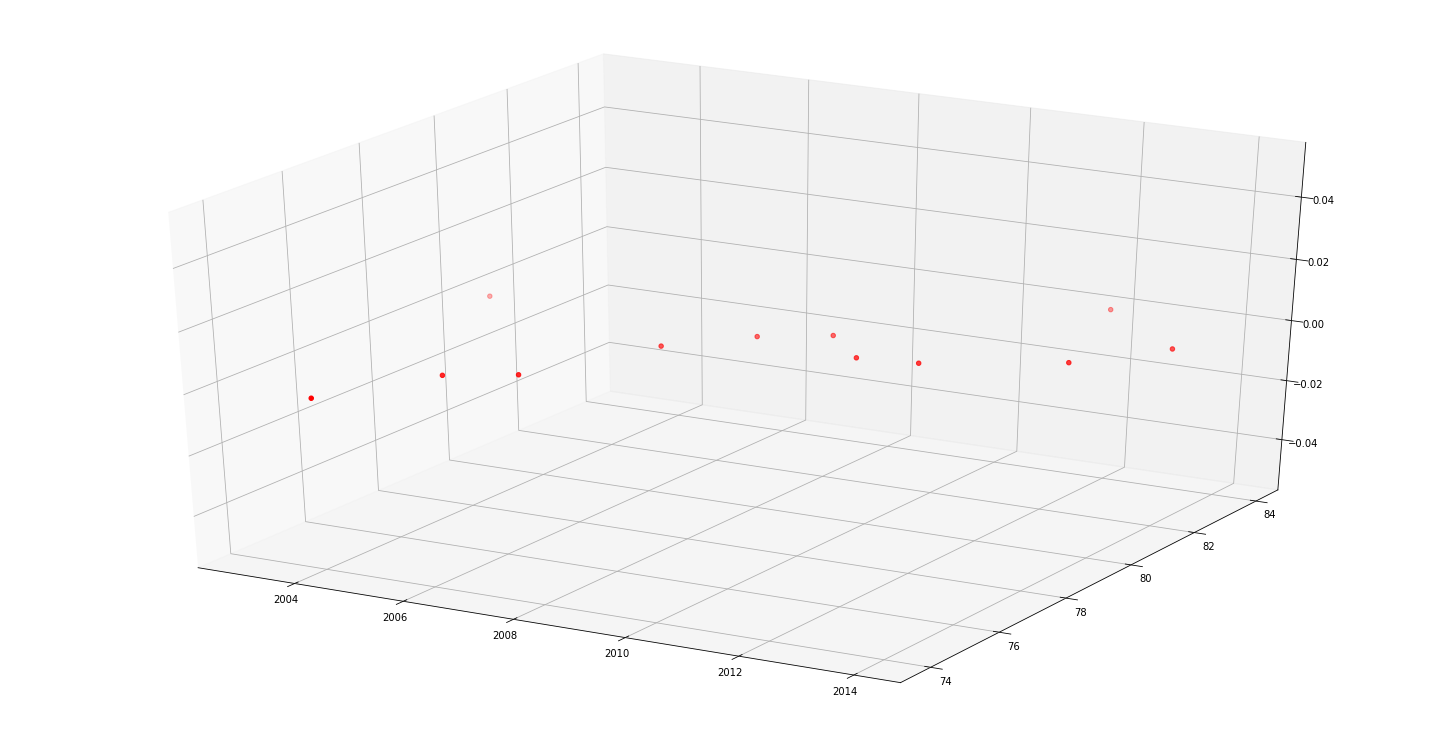

,year,wqi
0,2003,80.144669
1,2004,73.879310
2,2005,75.881629
3,2006,76.446634
4,2007,78.864943
5,2008,80.031718
6,2009,80.633930
7,2010,79.679017
8,2011,79.855016
9,2012,83.986774


In [31]:
#visualizing the filttered data

year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

In [32]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2003,80.144669
1,2004,73.879310
2,2005,75.881629
3,2006,76.446634
4,2007,78.864943


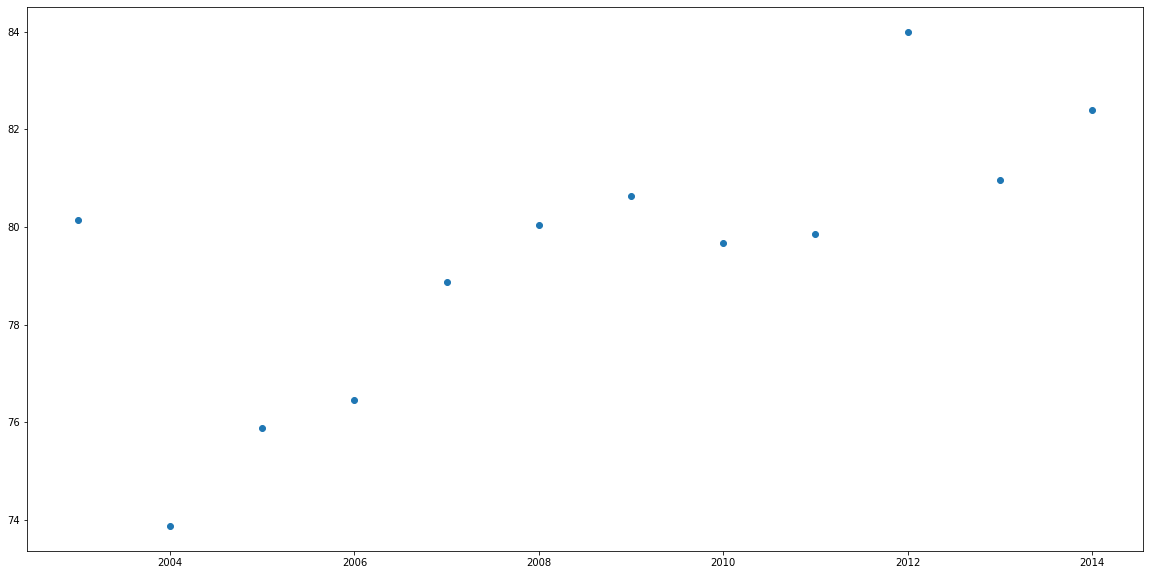

In [33]:
#scatter plot of data points
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

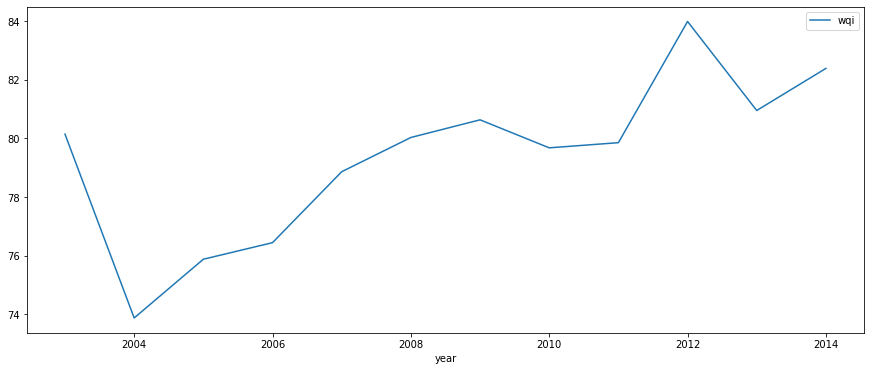

In [34]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [35]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2003,80.144669
1,2004,73.879310
2,2005,75.881629
3,2006,76.446634
4,2007,78.864943
5,2008,80.031718
6,2009,80.633930
7,2010,79.679017
8,2011,79.855016
9,2012,83.986774


In [36]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [37]:
cols =['year']
y = data['wqi']
x=data[cols]

In [38]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [39]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
a=reg.predict(x_test)
a

array([78.05903622, 78.60769583, 79.70501504])

In [41]:
y_test

3    76.446634
4    78.864943
6    80.633930
Name: wqi, dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:1.18


In [43]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [44]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.52542554],
       [ 1.        , -1.24807544],
       [ 1.        , -0.97072534],
       [ 1.        , -0.69337525],
       [ 1.        , -0.41602515],
       [ 1.        , -0.13867505],
       [ 1.        ,  0.13867505],
       [ 1.        ,  0.41602515],
       [ 1.        ,  0.69337525],
       [ 1.        ,  0.97072534],
       [ 1.        ,  1.24807544],
       [ 1.        ,  1.52542554]])

In [67]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 79.40, 2.08


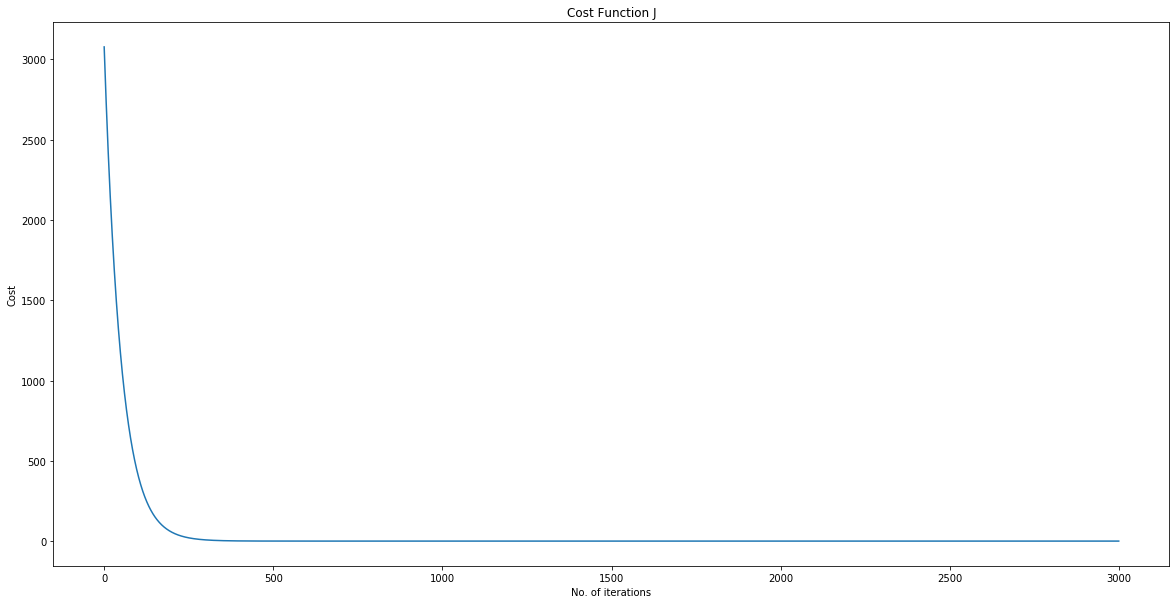

In [68]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [69]:
import numpy as np
newB=[79.40, 2.08]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,year,wqi,Actual,Predicted
0,2003,80.144669,80.144669,76.227115
1,2004,73.879310,73.879310,76.804003
2,2005,75.881629,75.881629,77.380891
3,2006,76.446634,76.446634,77.957779
4,2007,78.864943,78.864943,78.534668
5,2008,80.031718,80.031718,79.111556
6,2009,80.633930,80.633930,79.688444
7,2010,79.679017,79.679017,80.265332
8,2011,79.855016,79.855016,80.842221
9,2012,83.986774,83.986774,81.419109


In [70]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.8101294659056562


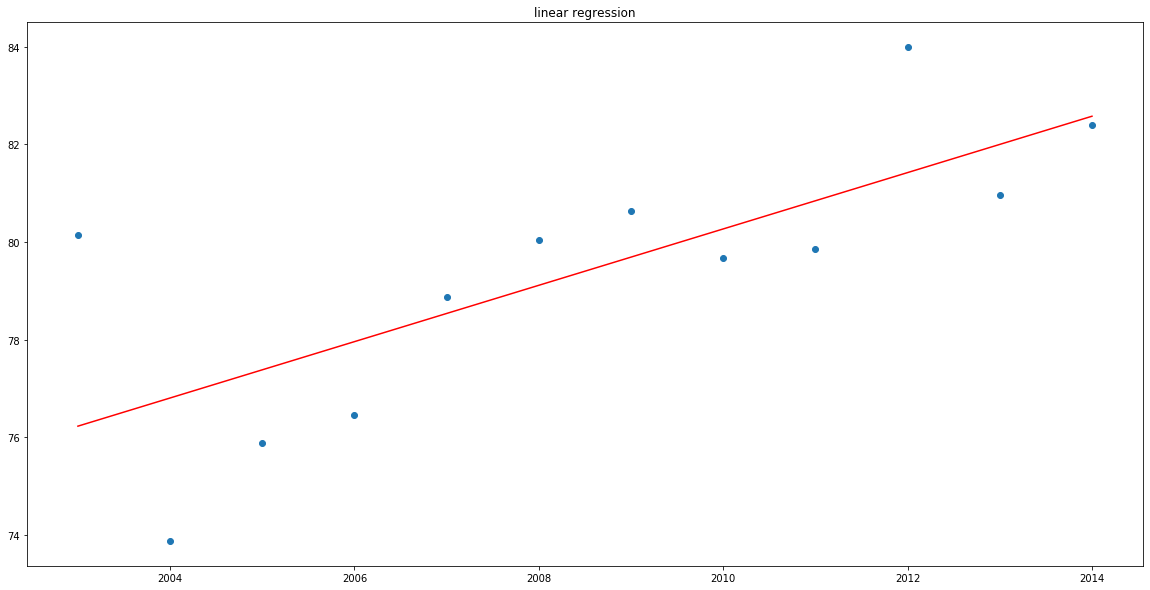

In [71]:
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()